## Exploratory Data Analysis

This notebook outlines some initial analysis that I performed to better understand my corpus of judicial opinions.

In [1]:
# import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

%matplotlib inline

In [2]:
# import the dataset
df_model = pd.read_csv('df_model_4.csv', index_col=0)

In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80749 entries, 0 to 80748
Data columns (total 8 columns):
casename       80749 non-null object
date           80748 non-null object
id             80749 non-null int64
judge          80749 non-null object
opinion        80749 non-null object
type           80749 non-null object
judge_count    80749 non-null int64
year           80748 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 5.5+ MB


### Analyzing the Judge Authorship Totals

The first thing that I will analyze is the judge authorship totals to confirm their accuracy.  The primary concern is the presence of multiple judges with the same last name.  To the extent possible, I would like to identify and parse out that data so that each judge's opinions can be analyzed separately.  As a starting point, let's see which judge names appear the most often as those are the most likely to include multiple authors:

In [22]:
df_model['judge'].value_counts()[:5]

per_curiam    6440
clark         3578
parker        2069
walker        1982
stacy         1936
Name: judge, dtype: int64

The most frequent occurrence, `per_curiam`, means that the court has issued its opinion without attribution to a particular judge, so I can ignore that total for now.  Let's take a look at the second most frequent author, which is `clark`.  As a first step, I will isolate the `clark` opinions into a separate dataframe and plot a distribution of the years in which the opinions were issued:

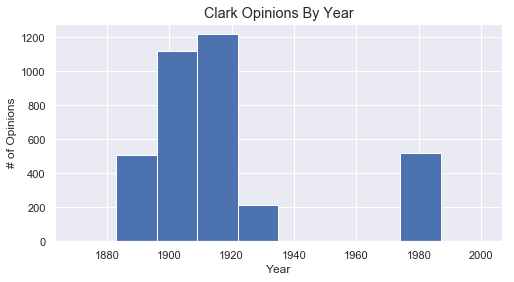

In [10]:
df_judge = df_model[df_model['judge'] == 'clark']
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.hist(df_judge['year'], bins=10, range=(1870, 2000))
_ = plt.title('Clark Opinions By Year', size='large')
_ = plt.xlabel('Year')
_ = plt.ylabel('# of Opinions')

As the histogram demonstrates, there two distinct sets of opinions: one group issued in the 1880-1930 time period by Justice Walker Clark and a second group issued in the 1960-1980 time period by Judge Edward Clark.

Let's plot another exmaple using the `walker` opinions:

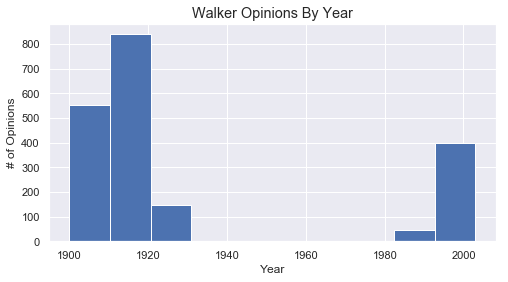

In [20]:
df_judge = df_model[df_model['judge'] == 'walker']
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.hist(df_judge['year'], bins=10, range=(1900, 2003))
_ = plt.title('Walker Opinions By Year', size='large')
_ = plt.xlabel('Year')
_ = plt.ylabel('# of Opinions')

This histogram similarly demonstrates two distinct groups: one set of opinions issued in the 1900-1925 time period by Justice Platt Walker and a second set of opinions issued in the 1985-2000 time period by Judge Ralph Walker.

Using this methodology, I was able to identify when multiple judges had the same last name and used the following code to separate those opinions for each particular judge:

In [23]:
from tqdm import tqdm
for row in tqdm(range(len(df_model))):
    
    if df_model.loc[row, 'judge'] == 'clark':
        if df_model.loc[row, 'year'] < 1950:
            df_model.loc[row, 'judge'] = 'clark_walter'
        else:
            df_model.loc[row, 'judge'] = 'clark_edward'
    
    elif df_model.loc[row, 'judge'] == 'parker':
        if df_model.loc[row, 'year'] < 1984:
            df_model.loc[row, 'judge'] = 'parker_robert'
        else:
            df_model.loc[row, 'judge'] = 'parker_sarah'
    
    elif df_model.loc[row, 'judge'] == 'walker':
        if df_model.loc[row, 'year'] < 1940:
            df_model.loc[row, 'judge'] = 'walker_platt'
        else:
            df_model.loc[row, 'judge'] = 'walker_ralph'
    
    elif df_model.loc[row, 'judge'] == 'smith':
        if df_model.loc[row, 'year'] < 1900:
            df_model.loc[row, 'judge'] = 'smith_william'
        else:
            df_model.loc[row, 'judge'] = 'smith_donald'
    
    elif df_model.loc[row, 'judge'] == 'johnson':
        if df_model.loc[row, 'year'] < 1970:
            df_model.loc[row, 'judge'] = 'johnson_jefferson'
        else:
            df_model.loc[row, 'judge'] = 'johnson_clifton'
    
    elif df_model.loc[row, 'judge'] == 'martin':
        if df_model.loc[row, 'year'] < 1978:
            df_model.loc[row, 'judge'] = 'martin_robert'
        elif df_model.loc[row, 'year'] > 1993:
            df_model.loc[row, 'judge'] = 'martin_mark'
        else:
            df_model.loc[row, 'judge'] = 'martin_harry'
    
    elif df_model.loc[row, 'judge'] == 'ruffin' and df_model.loc[row, 'year'] > 1875:
        df_model.loc[row, 'judge'] = 'ruffin_jr'
        
    elif df_model.loc[row, 'judge'] == 'rodman' and df_model.loc[row, 'year'] > 1925:
        df_model.loc[row, 'judge'] = 'rodman_jr'

100%|███████████████████████████████████████████████████████████████████████████| 80749/80749 [02:55<00:00, 459.52it/s]


In [4]:
# Final judge authorship counts
df_model['judge'].value_counts()

per_curiam         6440
clark_walter       3060
stacy              1936
parker_robert      1613
pearson            1564
hedrick            1541
walker_platt       1538
connor             1447
smith_william      1396
clarkson           1294
hoke               1251
ruffin             1247
brown              1243
greene             1184
arnold             1167
morris             1040
vaughn             1035
hunter              965
wells               948
wynn                934
winborne            925
merrimon            921
britt               921
eagles              919
denny               902
battle              885
adams               857
brock               836
devin               834
allen               821
                   ... 
jones                45
taylorhall           43
valentine            41
doderidge            41
arrowood             40
locke                39
cameron              33
varser               31
johnston             31
haywood              25
butterfield     

In [5]:
df_model.head()

,casename,date,id,judge,opinion,type,judge_count,year
0,ACT-UP Triangle v. Commission for Health Services,1997-04-11,53839,frye,"FRYE, Justice.\nThis case involves the adoptio...",majority,415,1997.0
1,Mahoney v. Ronnie’s Road Service,1997-03-07,53841,per_curiam,PER CURIAM.\nAFFIRMED.\nJustice PARKER did not...,majority,6440,1997.0
2,State v. Westbrooks,1996-12-06,53843,parker_sarah,"PARKER, Justice.\nDefendant, Donna Sue Westbro...",majority,456,1996.0
3,State v. Conner,1997-02-10,53847,whichard,"WHICHARD, Justice.\nOn 13 November 1990, defen...",majority,661,1997.0
4,Fulton Corp. v. Faulkner,1997-02-10,53848,webb,"WEBB, Justice.\nThis case brings to the Court ...",majority,801,1997.0


### Building Additional Features for Analysis

I next will build some additional features about the opinions to see if I can identify any meaningful trends.  To do this, I will use `TextBlob`, a powerful text-processing package that provides access to a number of common text-processing operations:

In [3]:
# import textblob
from textblob import TextBlob

In [11]:
# add word count for each opinion
df_model['word_count'] = df_model['opinion'].apply(lambda x: len(TextBlob(x).words))

In [12]:
# add sentence count for each opinion
df_model['sentence_count'] = df_model['opinion'].apply(lambda x: len(TextBlob(x).sentences))

In [13]:
# add average sentence length
df_model['avg_sent_length'] = df_model['word_count'] / df_model['sentence_count']

In [15]:
# add polarity (measures the positivity or negativity of text on -1.0-to-1.0 scale)
df_model['polarity'] = df_model['opinion'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
# add subjectivity (measures how objective or subjective a text is on a 0.0-to-1.0 scale (greater = more subjective))
df_model['subjectivity'] = df_model['opinion'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [2]:
# save the dataframe to a local .csv file
# export_df = df_model.to_csv('df_model_5.csv')
df_model = pd.read_csv('df_model_5.csv', index_col=0)

### Initial Statistical Analysis

Now that I have built some additional features, I will calcuate some standard statistical metrics using `.describe()` to see if I can identify anything significant:

In [7]:
df_model.describe()

,id,judge_count,year,word_count,sentence_count,avg_sent_length,polarity,subjectivity
count,8.074900e+04,80749.000000,80749.000000,80749.000000,80749.000000,80749.000000,80749.000000,80749.000000
mean,8.307024e+06,1357.066973,1945.019109,1429.290431,63.348896,24.046260,0.044979,0.413238
std,2.429634e+06,1610.408025,51.776457,1635.155151,77.184857,9.478164,0.079873,0.111414
min,5.383900e+04,3.000000,1779.000000,3.000000,1.000000,1.500000,-0.800000,0.000000
25%,8.525955e+06,508.000000,1909.000000,447.000000,18.000000,18.075472,0.000000,0.367555
50%,8.617536e+06,834.000000,1960.000000,953.000000,38.000000,22.138889,0.041671,0.416547
75%,8.683072e+06,1396.000000,1987.000000,1849.000000,81.000000,28.563636,0.081773,0.466285
max,1.242523e+07,6440.000000,2017.000000,49111.000000,2169.000000,203.500000,1.000000,1.000000


Interesting.  The word count, sentence count, and average sentence length columns all have mean values significantly higher than their median value (the 50% result).  All three features also have abnormally large standard deviations.  It is clear that they are being skewed by a few unusually long opinions.

The polarity and subjectivity features appear to be normally distributed, with the opinions on average trending slightly positive and slightly more objective than subjective.

### Court Opinion Trends Over Time

I will now use these new features to explore how the characteristics of North Carolina court opinions have evolved over time.  In order to do this, I will create a new dataframe sorting the data by year of court opinion publication:

In [4]:
# create the year dataframe
df_year = pd.DataFrame(df_model['year'].value_counts())
df_year.columns = ['num_opinions']

# add the data sorted by year to the dataframe
df_year['word_count'] = df_model[['year', 'word_count']].groupby(['year']).mean().astype(int)
df_year['sentence_count'] = df_model[['year', 'sentence_count']].groupby(['year']).mean().astype(int)
df_year['avg_sent_length'] = df_model[['year', 'avg_sent_length']].groupby(['year']).mean().astype(int)
df_year['polarity'] = df_model[['year', 'polarity']].groupby(['year']).mean()
df_year['subjectivity'] = df_model[['year', 'subjectivity']].groupby(['year']).mean()

# QC the dataset by checking the length
len(df_year)

231

In [6]:
# display the dataframe
df_year = df_year.sort_index()
df_year.head()

,num_opinions,word_count,sentence_count,avg_sent_length,polarity,subjectivity
1779,2,196,5,37,0.019333,0.332862
1784,1,19,1,19,0.000000,0.000000
1787,1,1720,43,40,0.078558,0.343851
1789,6,57,3,21,0.144850,0.247338
1790,3,285,21,13,0.080586,0.268388


### Number of Opinions Over Time

First, I will graph the number of opinions issued each year:

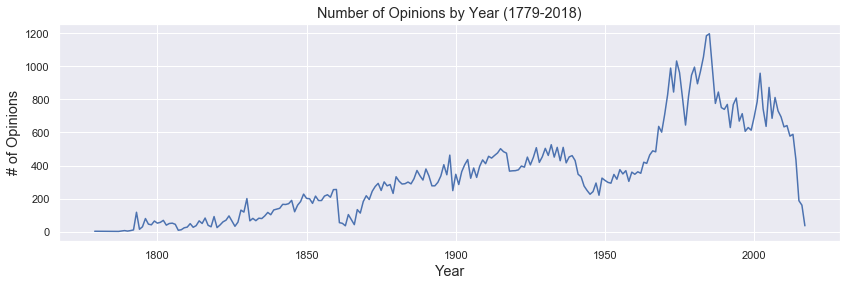

In [12]:
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.plot(df_year.index, df_year.num_opinions)
_ = plt.title('Number of Opinions by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('# of Opinions', size='large')
_ = plt.show()

The graph demonstrates an overall gradual increase of opinions over time until recently, with a significant increase in the number of opinions in the 1960-1980 time period.

### Word Count Over Time

Next I will graph the average word counts of the court opinions over time:

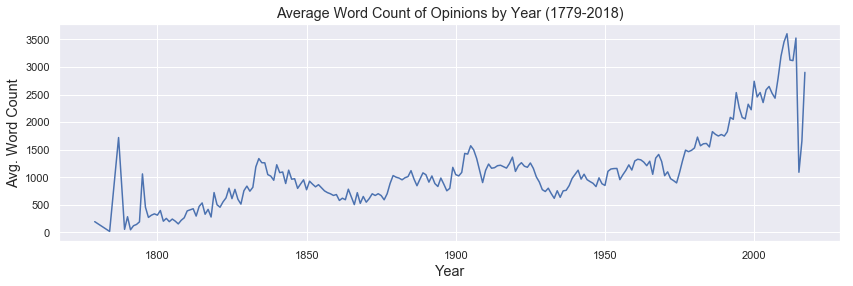

In [18]:
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.plot(df_year.index, df_year.word_count)
_ = plt.title('Average Word Count of Opinions by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('Avg. Word Count', size='large')
_ = plt.show()

Opinion lengths from North Carolina courts have held steady at a range of 600-1500 words on average until the latter part of 20th century, when courts began to issue progressively longer opinions. That trend appears to have held steady (with the most recent fluctuation likely due to a smaller sample size because not all opinions for the most recent years have yet become accessible and added to the database).

### Sentence Count/Length Over Time

Next, I will graph the average number of sentences per opinion and average sentence length over time:

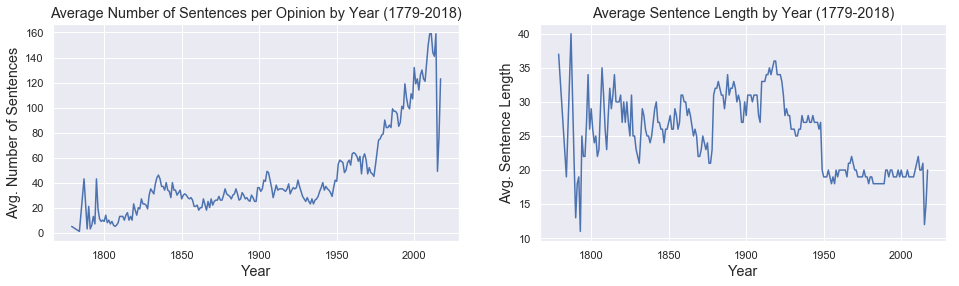

In [22]:
_ = sns.set()
_ = plt.figure(figsize=(16, 4))
_ = plt.subplot(1,2,1)
_ = plt.plot(df_year.index, df_year.sentence_count)
_ = plt.title('Average Number of Sentences per Opinion by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('Avg. Number of Sentences', size='large')

_ = plt.subplot(1,2,2)
_ = plt.plot(df_year.index, df_year.avg_sent_length)
_ = plt.title('Average Sentence Length by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('Avg. Sentence Length', size='large')
_ = plt.show()

Interestingly, the data demonstrates that while the courts have tended to use more sentences per opinion (consistent with the word count increase discussed above), the courts have actually reduced the length of their sentences over time.  This could be indicative of a change towards a more declarative and concise writing style.

### Court Sentiment Over Time

Finally, I will investigate how court opinion sentiment has evolved over time:

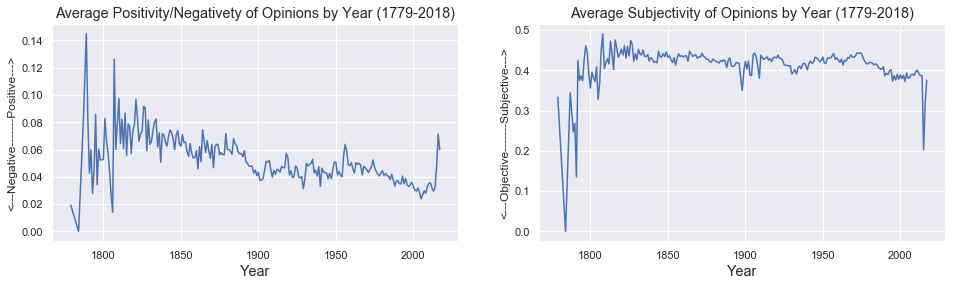

In [26]:
_ = sns.set()
_ = plt.figure(figsize=(16, 4))
_ = plt.subplot(1,2,1)
_ = plt.plot(df_year.index, df_year.polarity)
_ = plt.title('Average Positivity/Negativety of Opinions by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('<---Negative-------Positive--->')

_ = plt.subplot(1,2,2)
_ = plt.plot(df_year.index, df_year.subjectivity)
_ = plt.title('Average Subjectivity of Opinions by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('<---Objective-------Subjective--->')
_ = plt.show()

Overall, court opinions in North Carolina have skewed slightly positive, though they have steadily decreased in positivity over time.  Opinions also have skewed slightly more objective than subjective and appear to be trending slightly more objective in the modern era.

### Individual Judge Trends

I will now investigate the data per judge to see the degree to which North Carolina judges may or may not differ from one another regarding sentence structure and sentiment.  In order to do this, I will first create a dataframe sorting the data by judge:

In [27]:
# create the judge dataframe
df_judge = pd.DataFrame(df_model['judge'].value_counts())
df_judge.columns = ['num_opinions']

# add the data sorted by judge to the dataframe
df_judge['word_count'] = df_model[['judge', 'word_count']].groupby(['judge']).mean().astype(int)
df_judge['sentence_count'] = df_model[['judge', 'sentence_count']].groupby(['judge']).mean().astype(int)
df_judge['avg_sent_length'] = df_model[['judge', 'avg_sent_length']].groupby(['judge']).mean().astype(int)
df_judge['polarity'] = df_model[['judge', 'polarity']].groupby(['judge']).mean()
df_judge['subjectivity'] = df_model[['judge', 'subjectivity']].groupby(['judge']).mean()

# QC the dataset by checking the length
len(df_judge)

163

In [28]:
# display the dataframe
df_judge = df_judge.sort_index()
df_judge.head()

,num_opinions,word_count,sentence_count,avg_sent_length,polarity,subjectivity
adams,857,1098,37,29,0.033055,0.407464
allen,821,1052,27,40,0.046041,0.425368
arnold,1167,972,55,17,0.041463,0.419609
arrowood,40,3122,158,19,0.031917,0.403658
ashe,634,798,26,29,0.067413,0.446039


### Average Opinion Word Counts by Judge

First, I will graph the distribution of average word counts by judge:

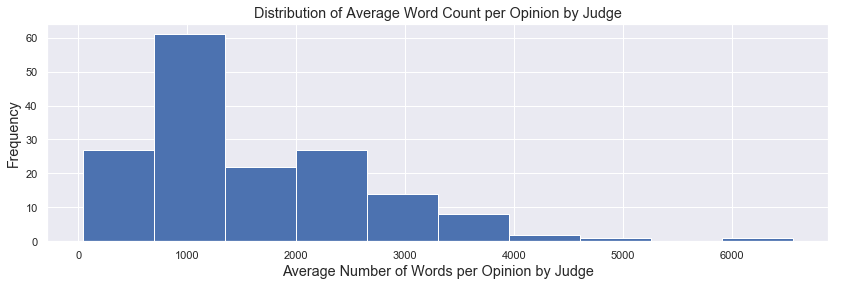

In [41]:
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.hist(df_judge.word_count)
_ = plt.title('Distribution of Average Word Count per Opinion by Judge', size='large')
_ = plt.xlabel('Average Number of Words per Opinion by Judge', size='large')
_ = plt.ylabel('Frequency', size='large')
_ = plt.show()

The distribution demonstrates the average length of opinions per judge varies quite significantly.  While just over 60 judges average in the 1000-word opinion range, approximately 50 judges average more than double that amount per opinion, with the most verbose judges averaging over 4000 words per opinion (those poor law clerks!).

### Average Number of Sentences per Opinion by Judge

Next, I will analyze the average number of sentences each judge uses in his or her opinions:

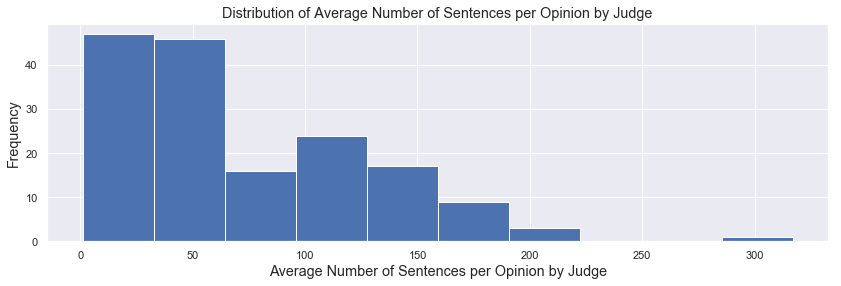

In [39]:
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.hist(df_judge.sentence_count)
_ = plt.title('Distribution of Average Number of Sentences per Opinion by Judge', size='large')
_ = plt.xlabel('Average Number of Sentences per Opinion by Judge', size='large')
_ = plt.ylabel('Frequency', size='large')
_ = plt.show()

The average number of sentences used by judge skews left, with approximately half of the judges averaging 60 or less sentences per opinion.  There are a group of approximately 50 judges that use well over 100 sentences per opinion, though, with a few outliers averaging in excess of 200.  

### Average Sentence Length by Judge

Next, I will analyze the sentence length distribution for the judges:

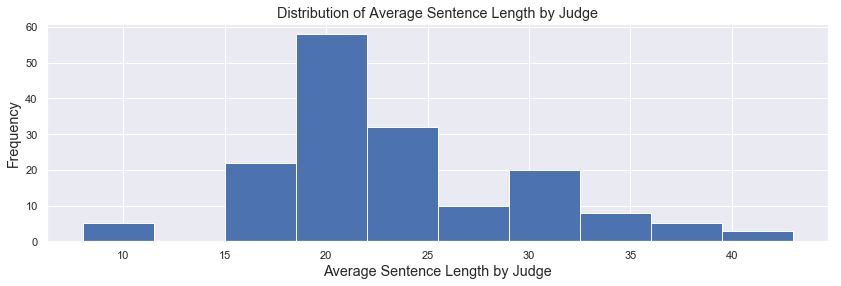

In [40]:
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.hist(df_judge.avg_sent_length)
_ = plt.title('Distribution of Average Sentence Length by Judge', size='large')
_ = plt.xlabel('Average Sentence Length by Judge', size='large')
_ = plt.ylabel('Frequency', size='large')
_ = plt.show()

This distribution is quite interesting.  There are a handful of judges that prefer quite concise sentences of approximately 10 words, while the few judges on the other end of the spectrum average nearly 40 words per sentence.  The most popular sentence length is in the 17-25 word range, where over half of the judges fall.

### Average Sentiment of Opinions by Judge

Finally, I will plot the average positivity/negativity and objectivity/subjectivity scores for each judge:

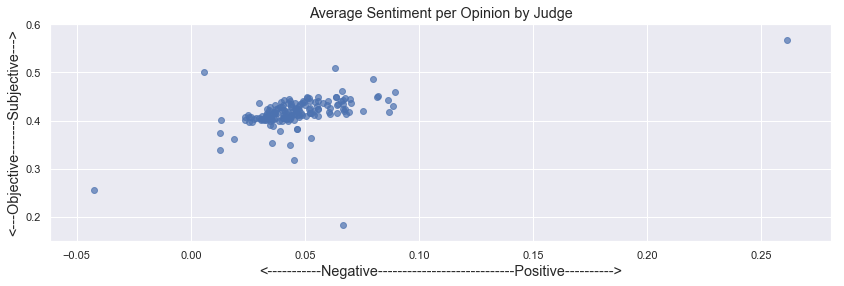

In [44]:
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.scatter(df_judge.polarity, df_judge.subjectivity, alpha=0.7)
_ = plt.title('Average Sentiment per Opinion by Judge', size='large')
_ = plt.xlabel('<-----------Negative----------------------------Positive---------->', size='large')
_ = plt.ylabel('<---Objective-------Subjective--->', size='large')
_ = plt.show()

The data demonstrates a quite localized cluster of opinions leaning slightly objective and positive where most judges fall.  There do appear to be about a quarter of the judges that deviate significantly from the cluster, however, with a few extreme outlier judges with very distinct average sentiments.

### Conclusions

Exploring the opinion structure and sentiment data has provided some valuable insights into the text that should assist in interpreting and analyzing model performance.  I have learned the following important characteristics about the corpus:

-  There are a few outlier judges that issued abnormally long opinions, which has skewed the mean and standard deviation for the word count and sentence count features.  It may be necessary to remove those outliers if they interfere with the model's ability to accurately identify those judges;

-  The courts issued progressively more opinions over time until the late 1900s, when the volume peaked.  Volume of opinions has steadily decreased in modern times;

-  Court opinions have gotten progressively longer over time, though interestingly the average sentence length has decreased over time.  This could be indicative of a stylistic writing change by the more modern judges;

-  There appears to be a fairly wide distribution of average words, sentences, and sentence length per opinion by judge.  We can use these features to gain insight into a particular judge's distinct writing style relative to his or her peers; and

-  Most North Carolina judges tend to write slightly objective and positive opinions, though about a quarter of them deviate significantly from this trend.


Now that I have some insights into the dataset, it's time to build some models!